#### Altas y portabilidad mensual de telefonía celular

In [112]:
import pandas as pd
from matplotlib import pyplot as plt

In [129]:
df_altas_mov=pd.read_csv('./6_movil_altas_mensuales_por_operador_2.csv')

In [58]:
#df_altas_mov.sort_values(by=['Mes','Año'],ascending=True,inplace=True)

In [130]:
df_altas_mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Año       106 non-null    int64 
 1   Mes       106 non-null    int64 
 2   Personal  106 non-null    int64 
 3   Claro     106 non-null    int64 
 4   Movistar  106 non-null    int64 
 5   Total     106 non-null    int64 
 6   Año-Mes   106 non-null    object
dtypes: int64(6), object(1)
memory usage: 5.9+ KB


In [131]:
df_altas_mov=df_altas_mov[df_altas_mov['Año']>2013]

In [132]:
df_altas_mov.head(3)

,Año,Mes,Personal,Claro,Movistar,Total,Año-Mes
0,2014,1,10790,14575,4724,30089,2014-1
1,2014,2,11052,16992,4948,32992,2014-2
2,2014,3,14253,21314,5635,41202,2014-3


In [106]:
df_altas_mov[['Año','Mes']]=df_altas_mov[['Año','Mes']].astype(str)
df_altas_mov['Año-Mes']=df_altas_mov['Año']+'-'+df_altas_mov['Mes']

In [175]:
df_altas_mov.head(3)

,Año,Mes,Personal,Claro,Movistar,Total,Año-Mes
0,2014,1,10790,14575,4724,30089,2014-1
1,2014,2,11052,16992,4948,32992,2014-2
2,2014,3,14253,21314,5635,41202,2014-3


In [127]:
#df_altas_mov.sort_values(by=['Año','Mes'],inplace=True)

In [128]:
#df_altas_mov.to_csv('./6_movil_altas_mensuales_por_operador_2.csv',index=False)

In [ ]:
import pandas as pd

# columnas ['Año'] y ['Mes'] en una columna de fecha
df_altas_mov['Fecha'] = df_altas_mov['Año'].astype(str) + '-' + df_altas_mov['Mes'].astype(str)

# Agrupar datos por trimestre y sumar los valores de las columnas numéricas
df_trimestral = df_altas_mov.groupby(pd.PeriodIndex(df_altas_mov['Fecha'], freq='Q')).sum()

df_trimestral


In [134]:
# variables para mi gráfico
#X1=df_altas_mov.index
X=df_altas_mov['Año-Mes']
y1=df_altas_mov['Personal']
y2=df_altas_mov['Claro']
y3=df_altas_mov['Movistar']

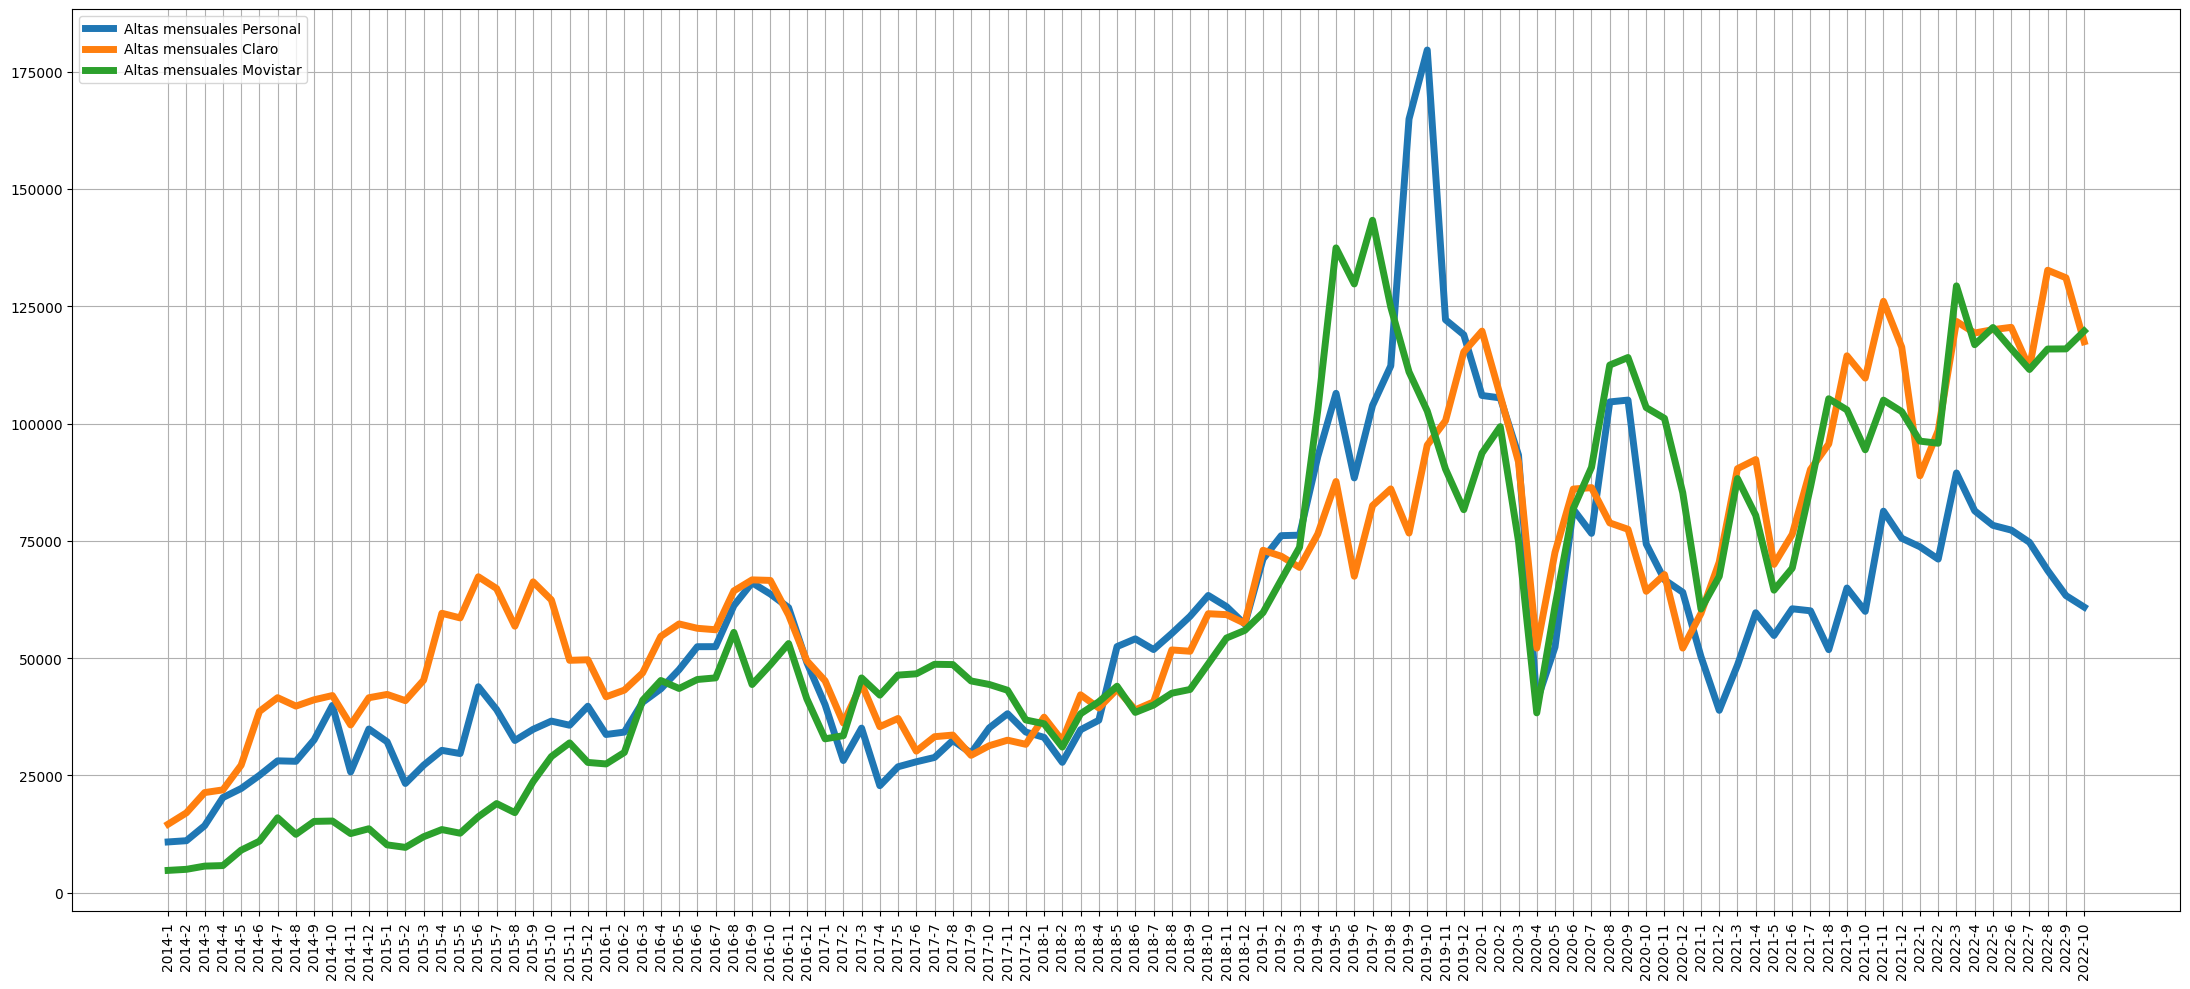

In [137]:
plt.figure(figsize=(22,10))
plt.plot(X,y1,linewidth=5, label='Altas mensuales Personal')
plt.plot(X,y2,linewidth=5, label='Altas mensuales Claro')
plt.plot(X,y3,linewidth=5, label='Altas mensuales Movistar')
plt.grid()
plt.xticks(rotation=90)
plt.legend(loc='upper left')  # Agregar leyenda
plt.tight_layout()  # Ajustar el espaciado
plt.show()

Nota : Se observa que durante el último trimestre de 2016 desciende la cantidad de altas mensuales, para luego subir de manera exponencial durante el período de la pandemia.

Se observa además, una marcada variación de altas a través de los meses y entre las distintas compañias.

#### Portabilidad líneas por mes

In [138]:
df_portabilidad=pd.read_csv('./7_movil_portabilidad_mensual_OK.csv')

In [149]:
df_portabilidad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, 22 to 127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Año       106 non-null    int64 
 1   Mes       106 non-null    int64 
 2   Personal  106 non-null    int64 
 3   Claro     106 non-null    int64 
 4   Movistar  106 non-null    int64 
 5   Año-Mes   106 non-null    object
dtypes: int64(5), object(1)
memory usage: 5.8+ KB


In [148]:
df_portabilidad.head(3)

,Año,Mes,Personal,Claro,Movistar,Año-Mes
22,2014,1,-200,6135,-4845,2014-1
23,2014,2,-2152,8757,-5531,2014-2
24,2014,3,-2314,10604,-7038,2014-3


In [143]:
df_portabilidad['Año-Mes']=df_portabilidad['Año'].astype(str) + '-' + df_portabilidad['Mes'].astype(str)

In [146]:
df_portabilidad=df_portabilidad[df_portabilidad['Año']>2013]

In [150]:
X_1=df_portabilidad['Año-Mes']
y_1=df_portabilidad['Personal']
y_2=df_portabilidad['Claro']
y_3=df_portabilidad['Movistar']

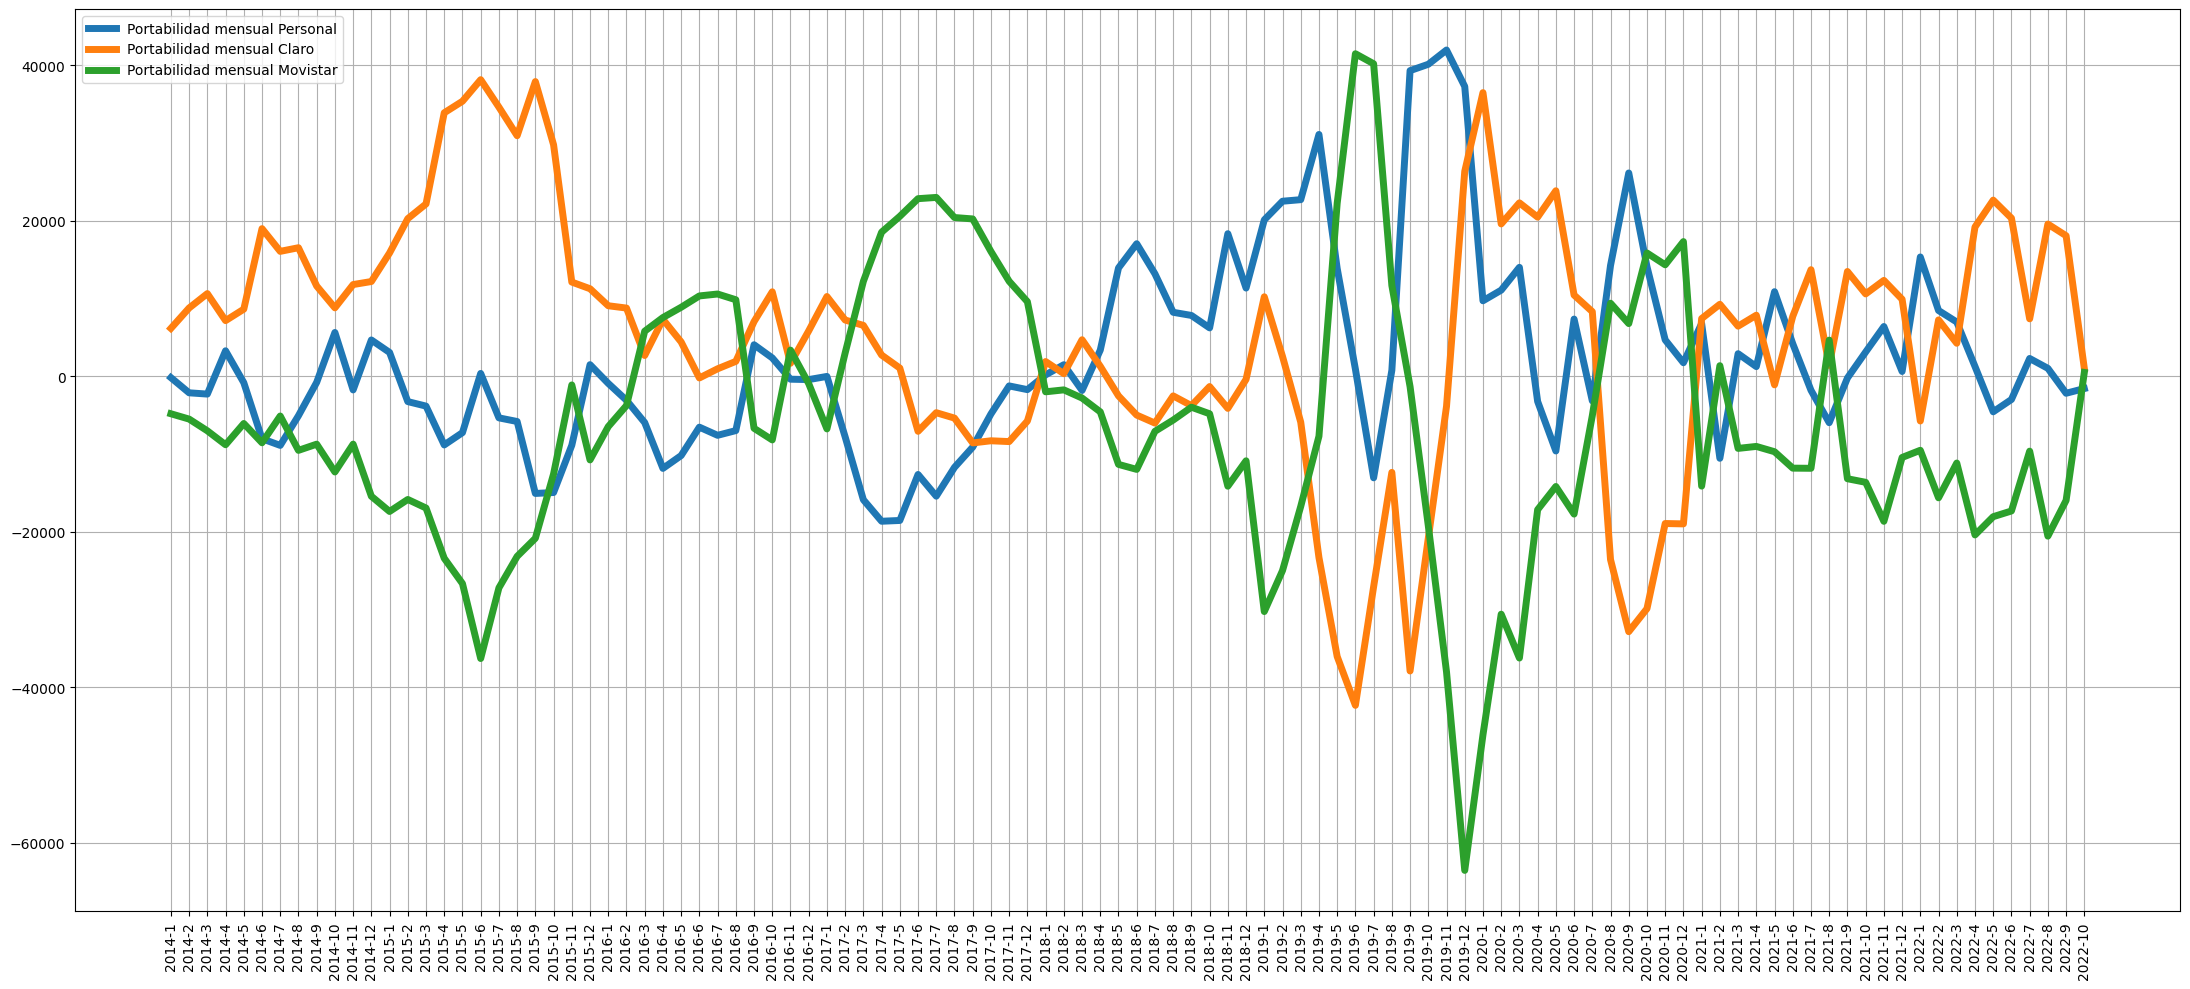

In [151]:
plt.figure(figsize=(22,10))
plt.plot(X_1,y_1,linewidth=5, label='Portabilidad mensual Personal')
plt.plot(X_1,y_2,linewidth=5, label='Portabilidad mensual Claro')
plt.plot(X_1,y_3,linewidth=5, label='Portabilidad mensual Movistar')
plt.grid()
plt.xticks(rotation=90)
plt.legend(loc='upper left')  # Agregar leyenda
plt.tight_layout()  # Ajustar el espaciado
plt.show()

In [159]:
df_portabilidad['Personal'].sum(),df_portabilidad['Claro'].sum(),df_portabilidad['Movistar'].sum()

(233187, 539147, -657182)

Nota : Podemos observar, que si bien no hay un patrón fácil de describir entre altas y bajas, quien ha perdido más clientes en el período detallado en el gráfico, es 'Movistar' frente a los saldos positivos de las competidoras : 

'Movistar' (-657182)

'Personal' (+233187)

'Claro'    (+539147).

In [162]:
# variables gráfico
x1=df_portabilidad['Personal'].sum()
x2=df_portabilidad['Claro'].sum()
x3=df_portabilidad['Movistar'].sum()
y=df_portabilidad[['Personal','Claro','Movistar']].sum()

In [ ]:
plt.figure(figsize=(22,10))
plt.bar(x1,y)
plt.bar(x2,y)
plt.bar(x3,y)
plt.grid()
plt.xticks(rotation=90)
plt.legend(loc='upper left')  # Agregar leyenda
plt.tight_layout()  # Ajustar el espaciado
plt.show()

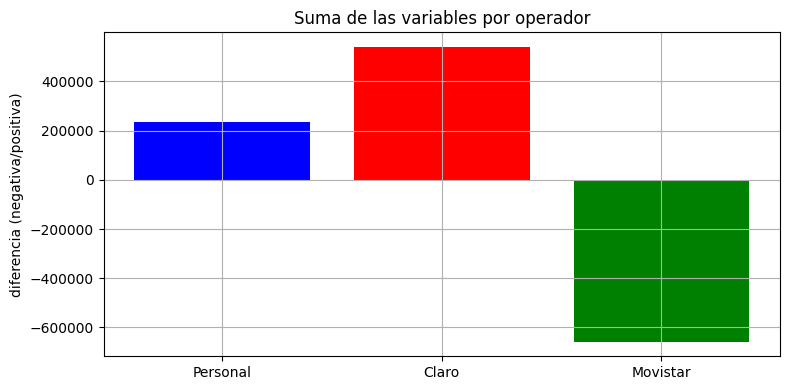

In [174]:
import matplotlib.pyplot as plt

# Valores de las variables
x1 = df_portabilidad['Personal'].sum()
x2 = df_portabilidad['Claro'].sum()
x3 = df_portabilidad['Movistar'].sum()

# Etiquetas de las barras
etiquetas = ['Personal', 'Claro', 'Movistar']
# Altura de las barras
altura = [x1, x2, x3]
# colores de las barras
colores =['blue','red','green']
# Crear gráfico de barras
plt.figure(figsize=(8,4))
plt.bar(etiquetas, altura, color=colores)

# Personalizar el gráfico
#plt.xlabel('Operador')
plt.ylabel('diferencia (negativa/positiva)')
plt.title('Suma de las variables por operador')
plt.grid()
plt.xticks(rotation=0)
#plt.legend(loc='upper left')  # Agregar leyenda
plt.tight_layout()  # Ajustar el espaciado
plt.show()

